In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig
%matplotlib inline

In [2]:
dfConst = pd.read_csv('/home/raricktj/Documents/neuroprocessorProject/neuro-simulation/collected_output/simple_synapse/constant/000275/output.csv',
                 names=['time', 'v1', 'v2'])
dfAdapt = pd.read_csv('/home/raricktj/Documents/neuroprocessorProject/neuro-simulation/collected_output/simple_synapse/adaptive/000275/output.csv',
                 names=['time', 'v1', 'v2'])
dfConst.head()

,time,v1,v2
0,0.000000,-0.070000,-0.050000
1,0.000275,-0.069873,-0.050064
2,0.000550,-0.069742,-0.050118
3,0.000825,-0.069607,-0.050161
4,0.001100,-0.069471,-0.050197


<IPython.core.display.Javascript object>


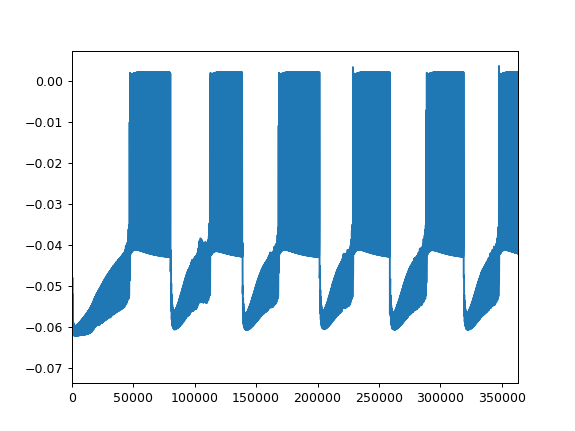

In [3]:
dfConst['v1'].plot()

(1e-08, 1)

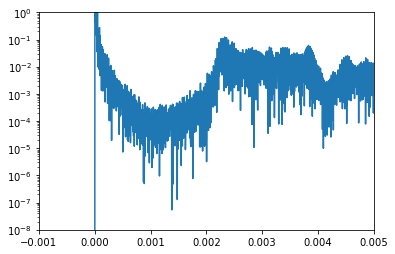

In [13]:
f, P = sig.periodogram(dfConst['v1'])
plt.semilogy(f, P)
# plt.grid(which='both', axis='both')
plt.xlim([-0.001, 0.005])
plt.ylim([10e-9, 1])

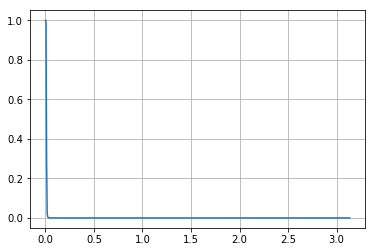

In [15]:
# fifth order, 5dB ripple, cutoff frequency of 0.003*Wn
order = 5
ripple = 0.1
cutoff = 0.003

b, a = sig.cheby1(order, ripple, cutoff, 'low')
w, h = sig.freqz(b, a)
plt.plot(w, abs(h))
plt.grid(which='both', axis='both')
plt.show()

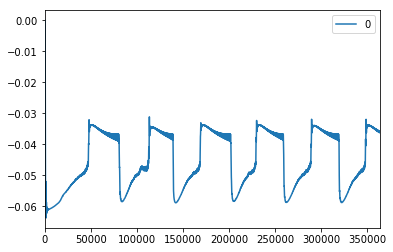

In [22]:
y = pd.DataFrame(sig.lfilter(b, a, dfConst['v1']))
y.plot()

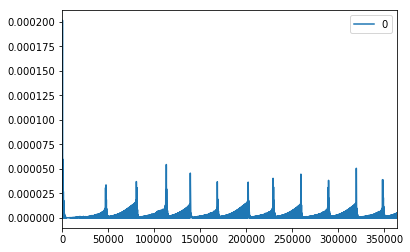

In [24]:
yDiff = abs(y.diff())
yDiff.plot()

<IPython.core.display.Javascript object>


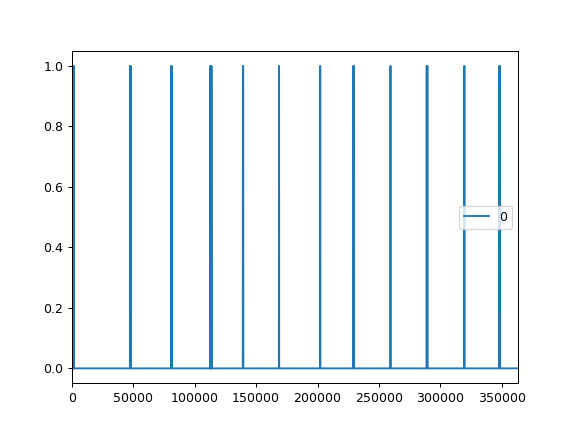

In [39]:
yDiff[(yDiff < 0.000025) & (yDiff > 0.0001)] = 0
yDiff[(yDiff != 0)] = 1
yDiff.plot()

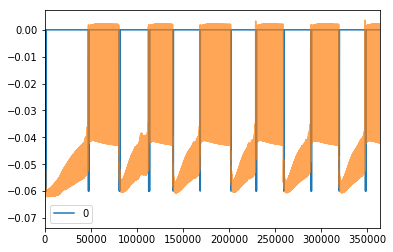

In [37]:
(yDiff.multiply(-0.06)).plot()
dfConst['v1'].plot(alpha=0.7)